/var/folders/m6/mgjfjp2s2b97v0p3wmv8x69m0000gn/T/ipykernel_49821/2616417588.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('GBPUSD=X', period='5y', interval='1d')
[*********************100%***********************]  1 of 1 completed


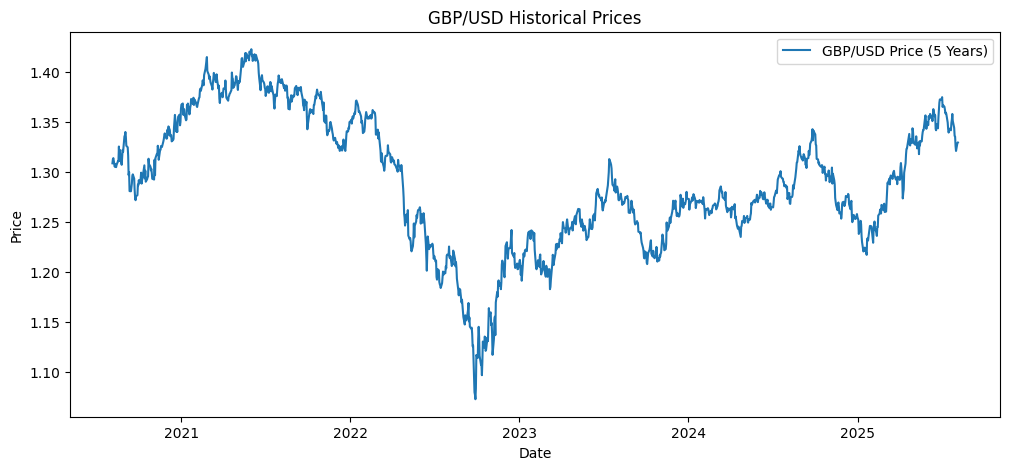

/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWar

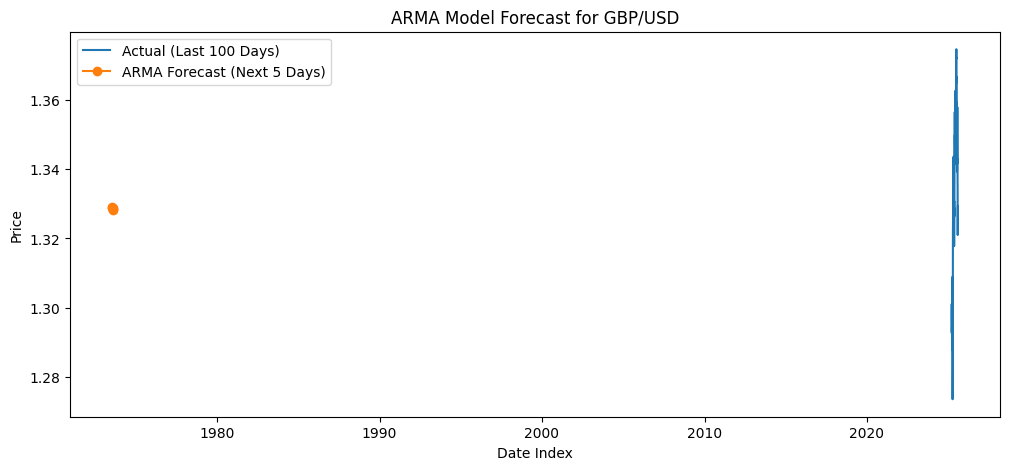

In [2]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Download 5 years of GBP/USD daily data
data = yf.download('GBPUSD=X', period='5y', interval='1d')
prices = data['Close'].dropna()

# Plot historical prices
plt.figure(figsize=(12, 5))
plt.plot(prices, label='GBP/USD Price (5 Years)')
plt.title('GBP/USD Historical Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Fit ARMA model (ARMA is ARIMA with d=0)
model = ARIMA(prices, order=(2, 0, 2))
model_fit = model.fit()

# Forecast the next 5 days
forecast = model_fit.forecast(steps=5)

# Plot actual and forecasted prices
plt.figure(figsize=(12, 5))
plt.plot(prices[-100:], label='Actual (Last 100 Days)')
plt.plot(range(len(prices), len(prices)+5), forecast, label='ARMA Forecast (Next 5 Days)', marker='o')
plt.title('ARMA Model Forecast for GBP/USD')
plt.xlabel('Date Index')
plt.ylabel('Price')
plt.legend()
plt.show()